# Project Foundations for Data Science: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final report.

### Let us start by importing the required libraries

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

# Read the data
df = pd.read_csv('/content/drive/MyDrive/MIT/Week 1/Project - FoodHub/foodhub_order.csv')
# Returns the first 5 rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Check the shape of the dataset
print("There are", df.shape[0], "rows and", df.shape[1], "columns in this dataset.")


There are 1898 rows and 9 columns in this dataset.


**Answer** 1: There are 1898 rows and 9 columns in this dataset.



### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [ ]:
# Checking the data types in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# Check why rating column has object data type
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

We can see the rating 'Not given' is mixed in with numerical values like 5, 4, and 3. This could potentially be changes so it reads as missing values (NaN), but we won't change this at the moment.

**Answer 2:** Observations


*   There are 5 numerical columns in the data (4 int, 1 float), and 4 object columns in the data.
*   Food preparation time and delivery time are being read as int type column, but it should be in date-time format.
*   Rating is being read as object type column but could also be considered a numerical column.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [ ]:
# Checking for missing values in the data
df.isnull().values.any()  # Write the appropriate function to print the sum of null values for each column

np.False_

**Answer 3**: There are no missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Get the summary statistics of the numerical data
df.describe().T  # Write the appropriate function to print the statistical summary of the data (Hint: you have seen this in the case studies before)

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


Both the Mean column and 75% column are written in scientific notation, making it hard to read.

In [ ]:
# Show floats with 2 decimal places and no scientific notation.
pd.set_option('display.float_format', '{:.2f}'.format)

# Re-run the description call
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


**Answer 4**: Minimum, average and maximum food preparation times
*    'food_preparation_time:' The minimum time taken to prepare food is 20 minutes.
*    'food_preparation_time:' The average time taken to prepare food is 27.37 minutes.
*    'food_preparation_time:' The maximum time taken to prepare food is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df['rating'].value_counts() # Complete the code

,count
rating,
Not given,736
5,588
4,386
3,188


**Answer 5:**
Of the 1898 orders in the dataset there are 736 'Not given' ratings, and 1162 numerical ratings. This means about 39% of orders did not receive a rating.

### Exploratory Data Analysis (EDA) Summary

*    There are 1898 rows and 9 columns in this dataset.
*    There are 5 numerical columns in the data (4 int, 1 float), and 4 object columns in the data. Food preparation time and delivery time are being read as int type column, but it should be in date-time format.
*    There are no missing values.
*    Food preparation time takes between 20 and 35 minutes with an average of 27.37.
*    736  orders (39%) are 'Not rated', with the other orders scoring between 3 and 5 out of 5.

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

There are 1898 unique order IDs.

#### Customer ID

In [ ]:
# check unique customer ID
df['customer_id'].nunique()  # Complete the code to find out the number of unique Customer ID

1200

There are 1200 unique customer IDs.

#### Restaurant name

In [ ]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  # Complete the code to find out number of unique Restaurant Name

178

There are 178 different restaurants included in the dataset.

#### Cuisine type

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique()  # Complete the code to find out the number of unique cuisine type

14

There are 14 different types of cuisine included in the dataset.

<Axes: xlabel='cuisine_type', ylabel='count'>

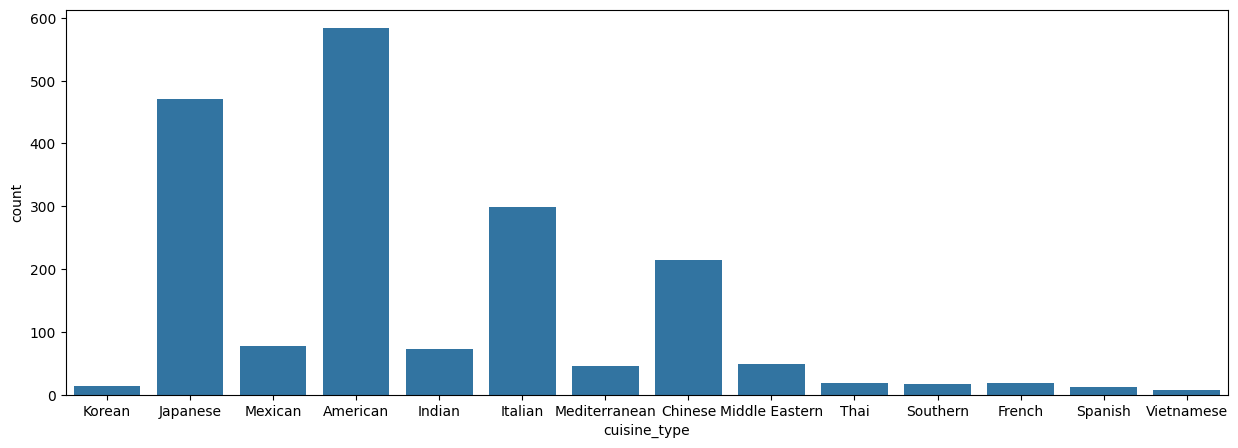

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') # Create a countplot for cuisine type

This chart shows the count of cuisines by order type, but we can make it more legible with an improved visualisation.

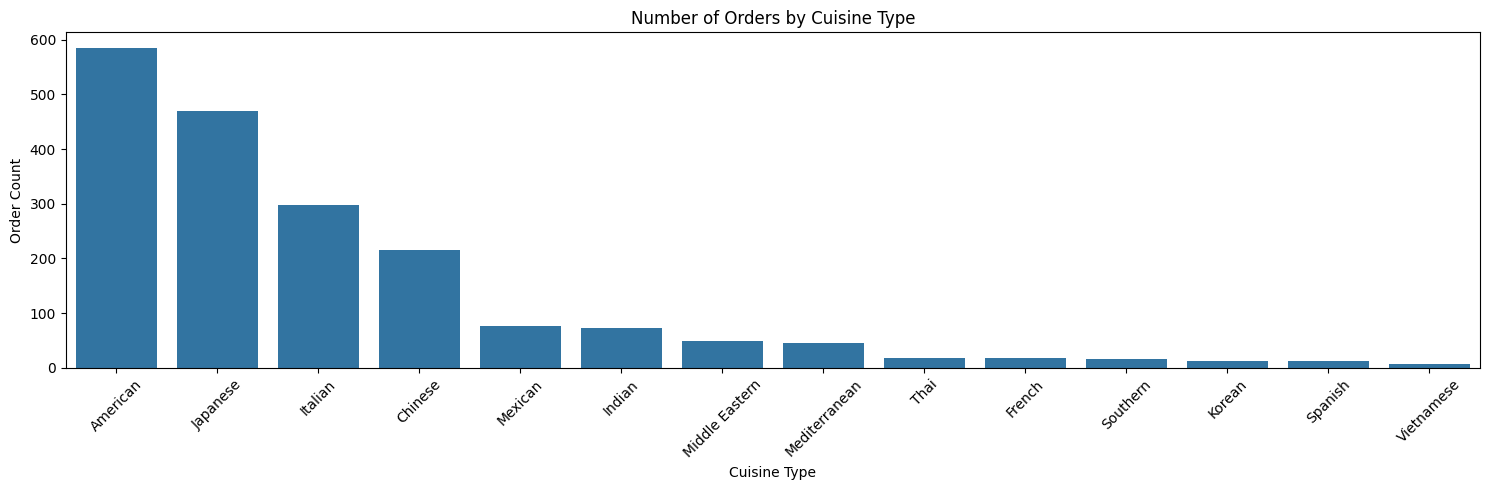

In [ ]:
# Improve the visualisation:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index)

plt.title('Number of Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Order Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

*    The top 4 most frequent orders are for American, Japanese, Italian and Chinese cuisine.
*    The next 4 most frequent orders are for Mexican, Indian, Middle Eastern and Mediterranean.
*    Thai, French, Southern, Korean, Spanish and Vietnamese make up the least popular cuisines ordered.


#### Cost of the order

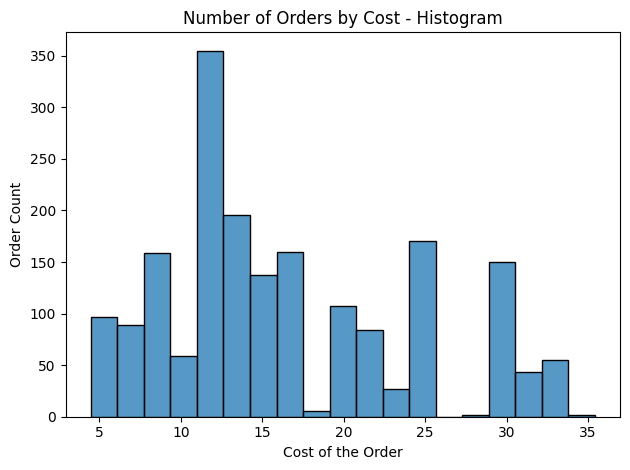

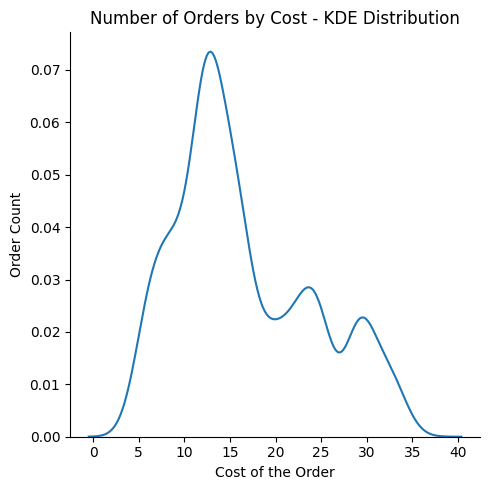

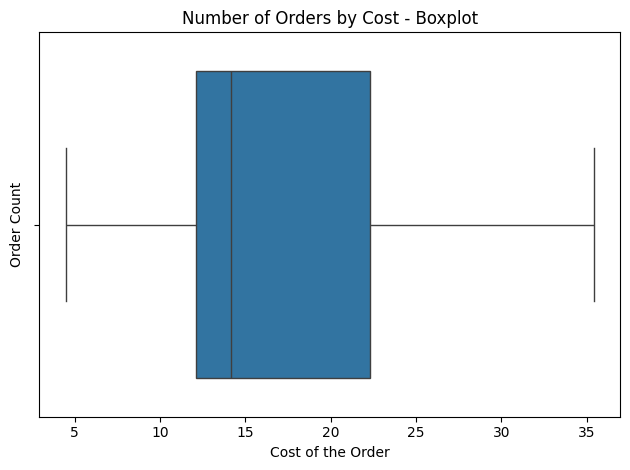

In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.title('Number of Orders by Cost - Histogram')
plt.xlabel('Cost of the Order')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

sns.displot(data=df,x=df['cost_of_the_order'],kind='kde') # Distribution plot for the cost of order
plt.title('Number of Orders by Cost - KDE Distribution')
plt.xlabel('Cost of the Order')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.title('Number of Orders by Cost - Boxplot')
plt.xlabel('Cost of the Order')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

*    The histogram is right-skewed.
*    Most orders are concentrated between 10 and 20 dollars, however there's a tail skewed to the right up to 35 dollars.
*    There are three visible order peaks, at 10-15 dollars, 20-25 dollars, and 30 dollars.
*    There are no outliers in the data.

#### Day of the week

In [ ]:
# # Check the unique values
df['day_of_the_week'].nunique() # Complete the code to check unique values for the 'day_of_the_week' column

2

The data shows two different days of the week data values.

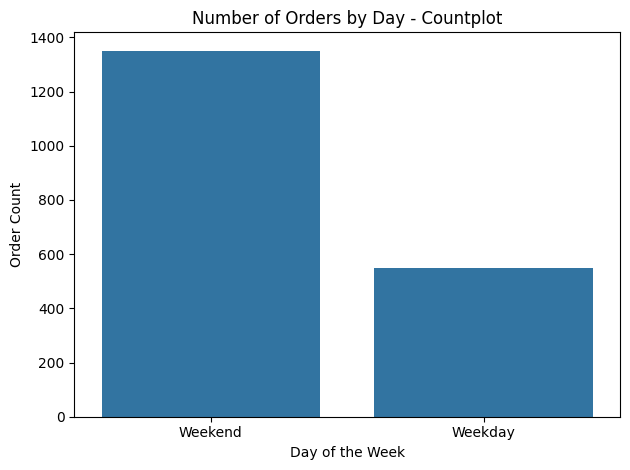

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week') # Complete the code to plot a bar graph for 'day_of_the_week' column
plt.title('Number of Orders by Day - Countplot')
plt.xlabel('Day of the Week')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

#### Rating

In [ ]:
# Check the unique values
df['rating'].nunique() # Complete the code to check unique values for the 'rating' column

4

There are 4 unique ratings in the dataset.

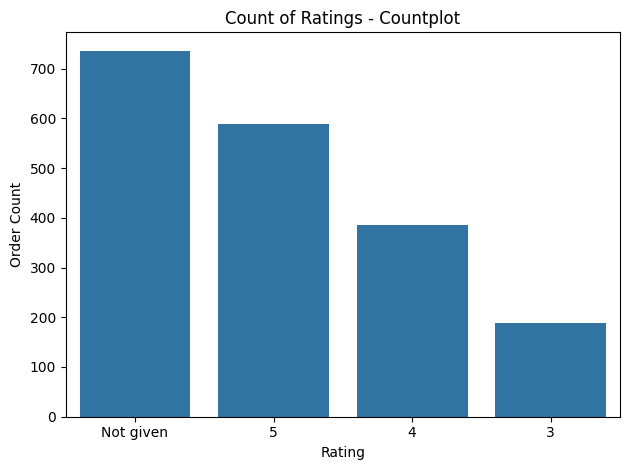

In [ ]:
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index) # Complete the code to plot bar graph for 'rating' column. # Sort ratings from highest to lowest
plt.title('Count of Ratings - Countplot')
plt.xlabel('Rating')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

*    'Not given' is the most frequent rating provided on orders (736).
*    The next most common rating is 5 stars (588).  

#### Food Preparation time

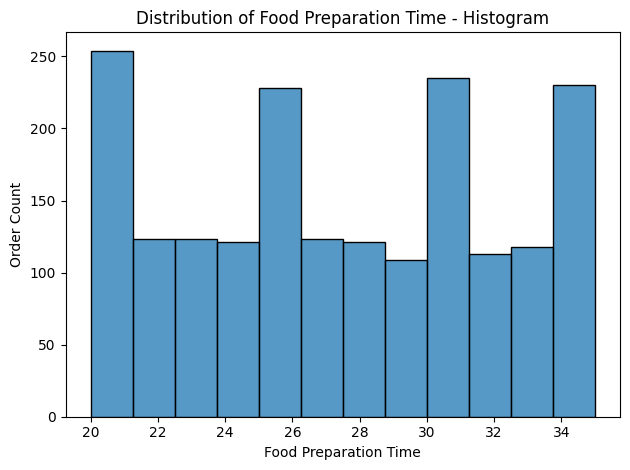

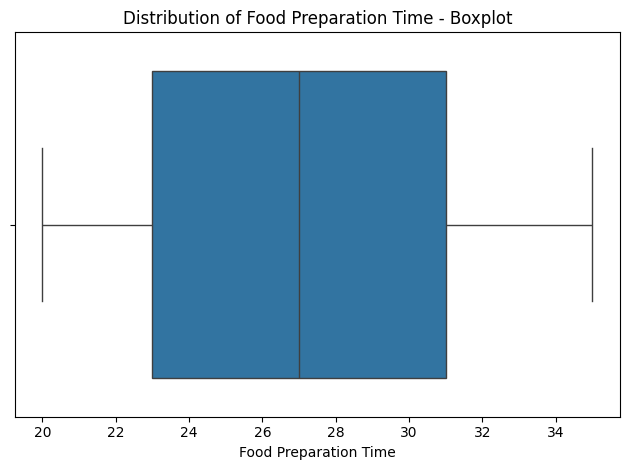

In [ ]:
sns.histplot(data=df,x='food_preparation_time') # Complete the code to plot the histogram for food preparation time
plt.title('Distribution of Food Preparation Time - Histogram')
plt.xlabel('Food Preparation Time')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

sns.boxplot(data=df,x='food_preparation_time') # Complete the code to plot the boxplot for food preparation time
plt.title('Distribution of Food Preparation Time - Boxplot')
plt.xlabel('Food Preparation Time')
plt.tight_layout()
plt.show()

*    The histogram is fairly uniform. There are some dips, not no skew left or right.
*    Most food takes between 20 and 35 minutes to prepare.
*    There are four visible food preparation time peaks, at 20, 26, 30 and 34 minutes.
*    There are no outliers in the data.

#### Delivery time

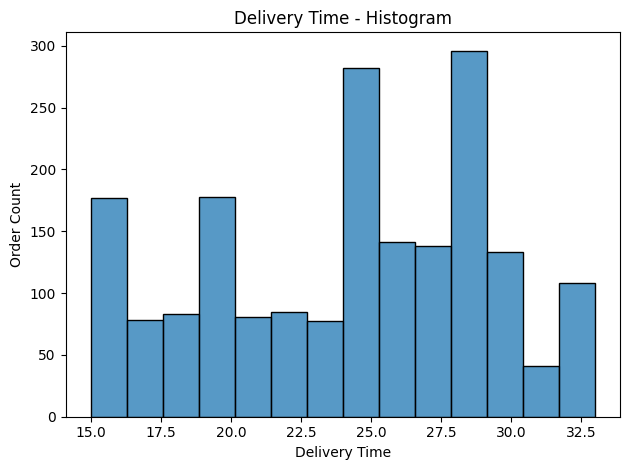

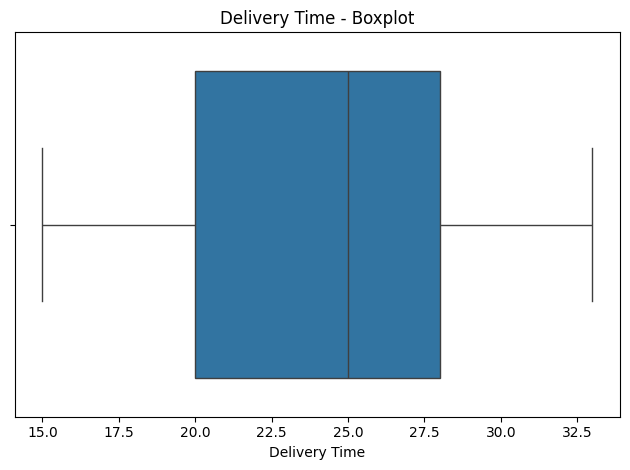

In [ ]:
sns.histplot(data=df,x='delivery_time') # Complete the code to plot the histogram for the delivery time
plt.title('Delivery Time - Histogram')
plt.xlabel('Delivery Time')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

sns.boxplot(data=df,x='delivery_time')  # Complete the code to plot the boxplot for the delivery time
plt.title('Delivery Time - Boxplot')
plt.xlabel('Delivery Time')
plt.tight_layout()
plt.show()

*    The histogram is fairly even, with mild peaks at 24-25 minutes and 27-28 minutes.
*    Delivery times range from 15 to 33 minutes.
*    The average delivery time is about 25 minutes.
*    There are no outliers in the data.


**Answer 6**:
*    There are 1200 unique customers across 1898 orders, indicating some are repeat customers.
*    The dataset includes 178 different restaurants.
*    The top 4 most ordered cuisines are American, Japanese, Italian and Chinese.
*    Cost of Order is right skewed, with most orders between 10 and 20 dollars. Costs peak at 10-15, 20-25 and 30 dollars.
*    Delivery days are distinguished as either week day or weekend, and may not fully represent fluctuations in orders across the week.
*    The most common rating is 'Not given', with 39% of orders not receiving a rating at all. However for rated orders, the most frequent is 5 stars. This suggests a positive bias for customers who choose to leave a rating.
*    Food preparation time is relatively uniform, ranging from 20 to 35 minutes, with clear peaks at 20, 26, 30 and 34 minutes. This may indicate differences in food preparation time across different cuisine types or restaurants.
*    Delivery times range from 15 to 33 minutes, averaging around 25 minutes. There are no outliers, suggesting delivery times are relatively consistent and predictable.

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5) # Complete the code

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


**Answer 7**: The top five restaurants by number of orders received are Shake Shack (219), The Meatball Shop (132), Blue Ribbon Sushi (119), Blue Ribbon Fried Chicken (96), and Parm (96).

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head(1)  # Complete the code to check unique values for the cuisine type on weekend

,count
cuisine_type,
American,415


**Answer 8**: The most popular cuisine on weekends is American, with 415 orders.

### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] # Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


**Answer 9**:
*    The total number of orders that cost more than $20 is 555.
*    This represents 29.24% of the total orders in the dataset.

### **Question 10:** What is the mean order delivery time? [1 mark]

In [ ]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  # Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


**Answer 10**: The mean delivery time for this dataset is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Get the counts of each customer_id
df['customer_id'].value_counts().head(5)  # Write the appropriate column name to get the 5 most frequent customers

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7


**Answer 11**: The missing column name was 'customer_id', and the top 5 customers by order frequency were:
*    52832  (13 orders)
*    47440  (10 orders)
*    83287  (9 orders)
*    250494 (8 orders)
*    259341 (7 orders)

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

<ipython-input-83-59af76f769c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')


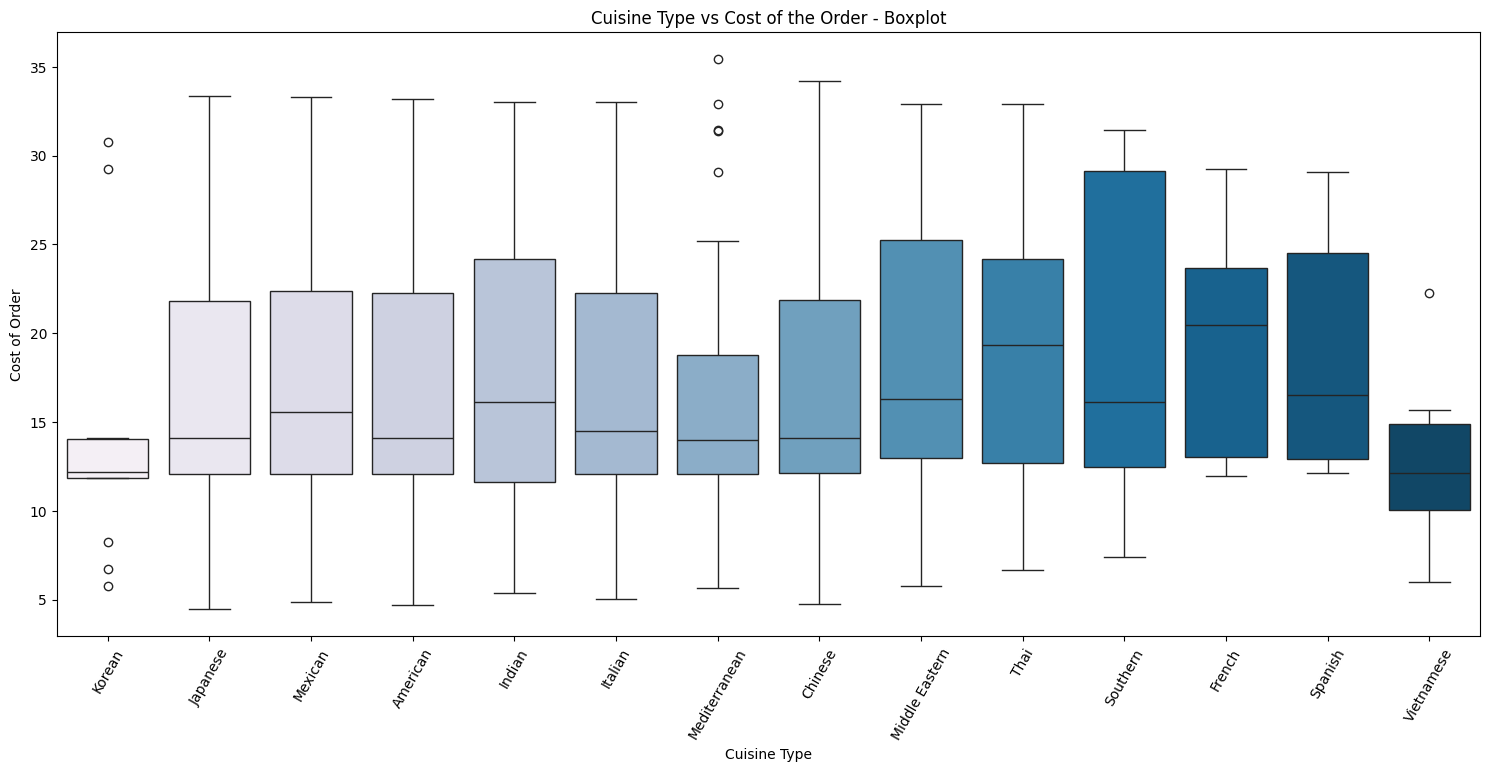

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')

plt.title('Cuisine Type vs Cost of the Order - Boxplot')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of Order')
plt.tight_layout()

plt.xticks(rotation = 60)
plt.show()




**Observations - Answer 12:**
The largest cost of order range is for the 'Southern' cuisine type, which may indicate a larger menu, and the smallest cost of order range is for the 'Korean' cuisine type, which may indicate a larger menu.

#### Cuisine vs Food Preparation time

<ipython-input-87-6542a18d9f45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='food_preparation_time', y='cuisine_type', data=df, palette='BuGn')  # Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot


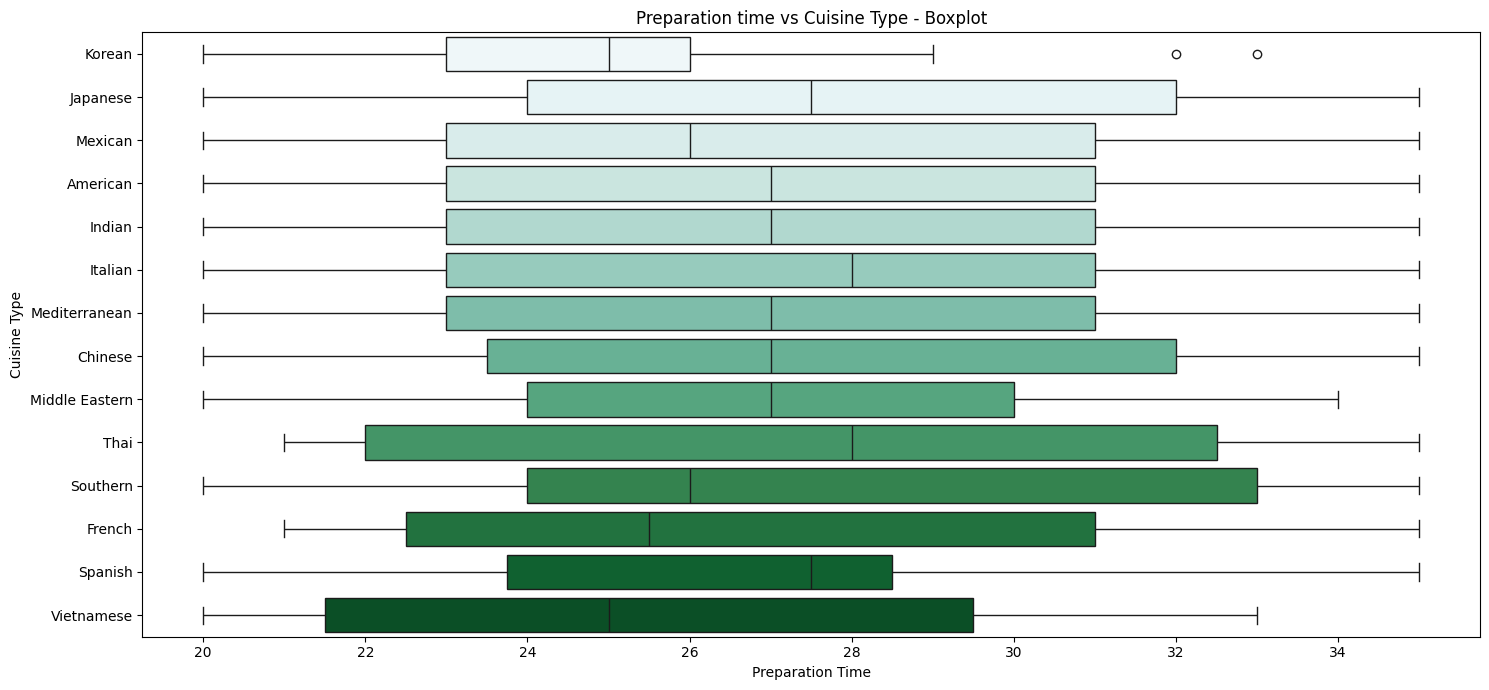

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x='food_preparation_time', y='cuisine_type', data=df, palette='BuGn')  # Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot

plt.title('Preparation time vs Cuisine Type - Boxplot') # Add some extra code to improve the visualisation
plt.xlabel('Preparation Time')
plt.ylabel('Cuisine Type')
plt.tight_layout()

plt.show()

**Observations - Answer 12:**
*    Most meals take between 20 and 35 minutes to prepare.
*    Korean food typically takes the least amount of time to prepare, although there are some outliers, which may indicate some inconsistent processes.
*    Southern and Thai food can take longer to prepare (although not for all orders), which may indicate a longer preparation/cooking time for some orders.
*    The IQR for many cuisines is 23 to 31 minutes, with the median taking approximately 27 minutes to prepare.

#### Day of the Week vs Delivery time

<ipython-input-88-8120e68ad2ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, palette='BuGn')  # Complete the code to visualize the relationship between day of the week and delivery time using boxplot


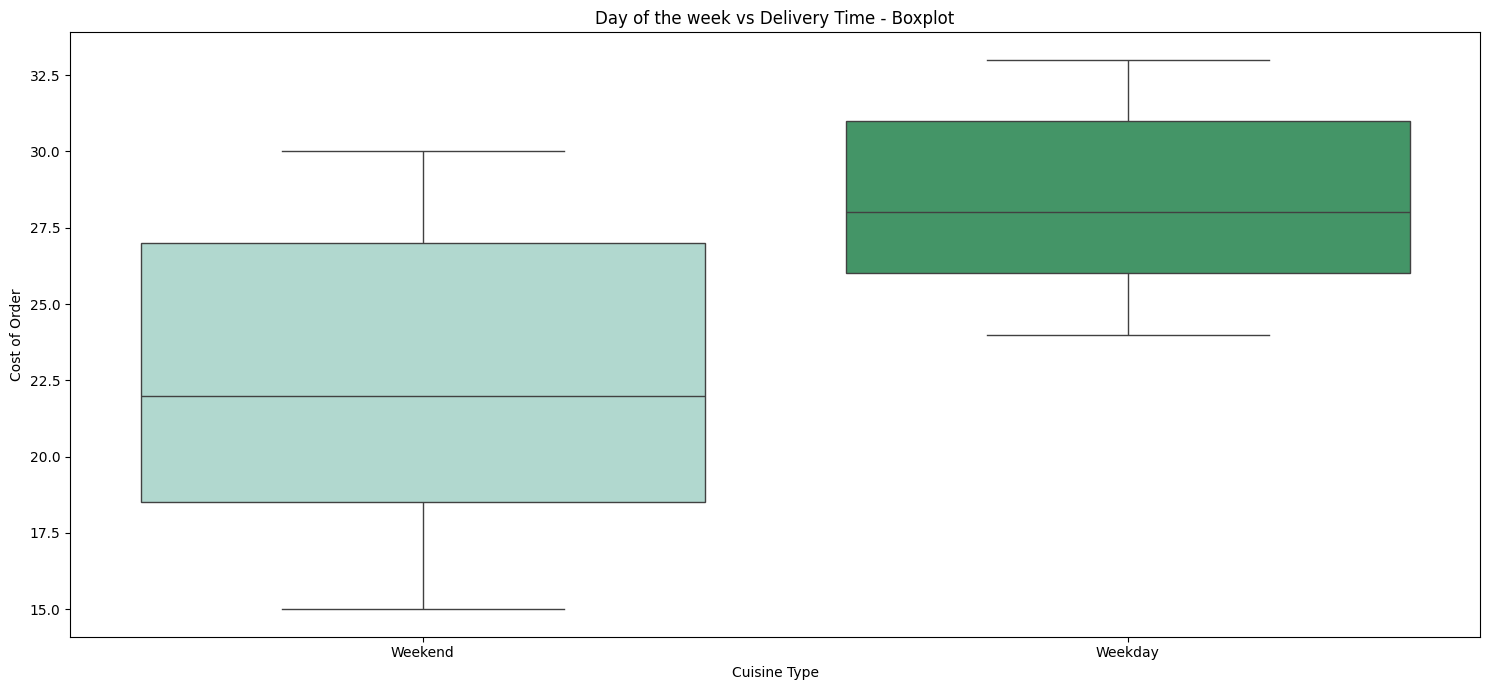

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, palette='BuGn')  # Complete the code to visualize the relationship between day of the week and delivery time using boxplot

plt.title('Day of the week vs Delivery Time - Boxplot') # Added code to improve visualisation.
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of Order')
plt.tight_layout()

plt.show()

**Observations - Answer 12:**
*    Weekend orders (average 22.5 minutes) are typically delivered faster than weekday orders (average of 27.5 minutes).
*    Some weekend orders are delivered as quickly as 15 minutes, with a maximum delivery time of just over 30 minutes. Whereas the fastest weekday orders take at least 25 minutes, with a maximum of over 32 minutes.
*    This variance may relate to other road traffic during weekdays which slows the delivery down.


#### Run the below code and write your observations on the revenue generated by the restaurants.

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


**Observations - Answer 12:**
*    The code has produced a list of the top 14 restaurants grouped by the total order value which is shown as a float (number with decimals).
*    Shake Shack has the highest total order value at 3,579.53 dollars, with the top 5 restaurants each totalling more than 1000 dollars.
*    The top 5 restaurants include a range of cuisines.

#### Rating vs Delivery time

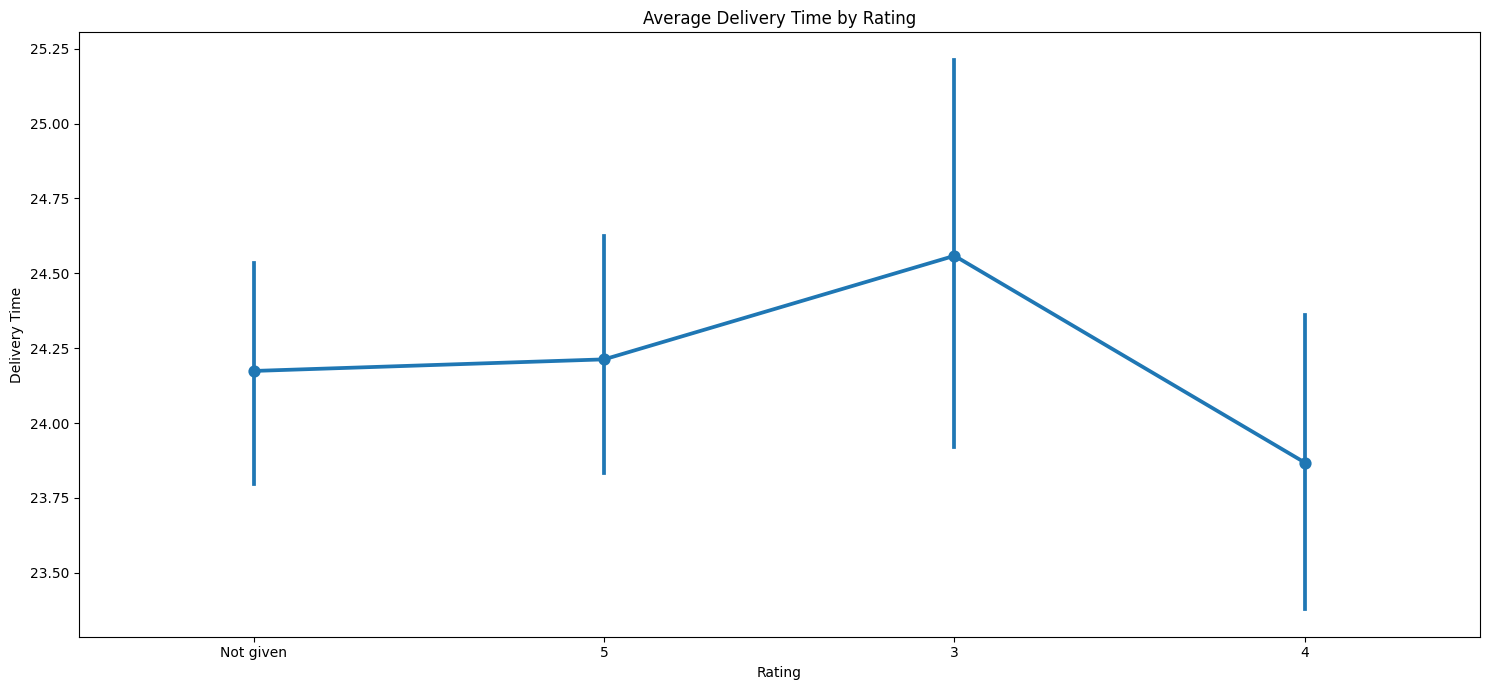

In [ ]:
# Relationship between rating and delivery time

plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.title('Average Delivery Time by Rating')
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
plt.tight_layout()
plt.show()


**Observations - Answer 12:**
*    The lowest rating (3) is for the highest average delivery time of 24.50 minutes, which may indicate a relationship between delivery time and customer satisfaction.
*    The average delivery time for ratings 'Not given' and 5 stars is approximately 24.25 minutes, whereas the average delivery time for a 4 rating is 23.75 minutes.
*    This indicates that faster delivery times does not necessarily translate to higher ratings, but slower delivery times can contribute to a lower rating.

#### Rating vs Food preparation time

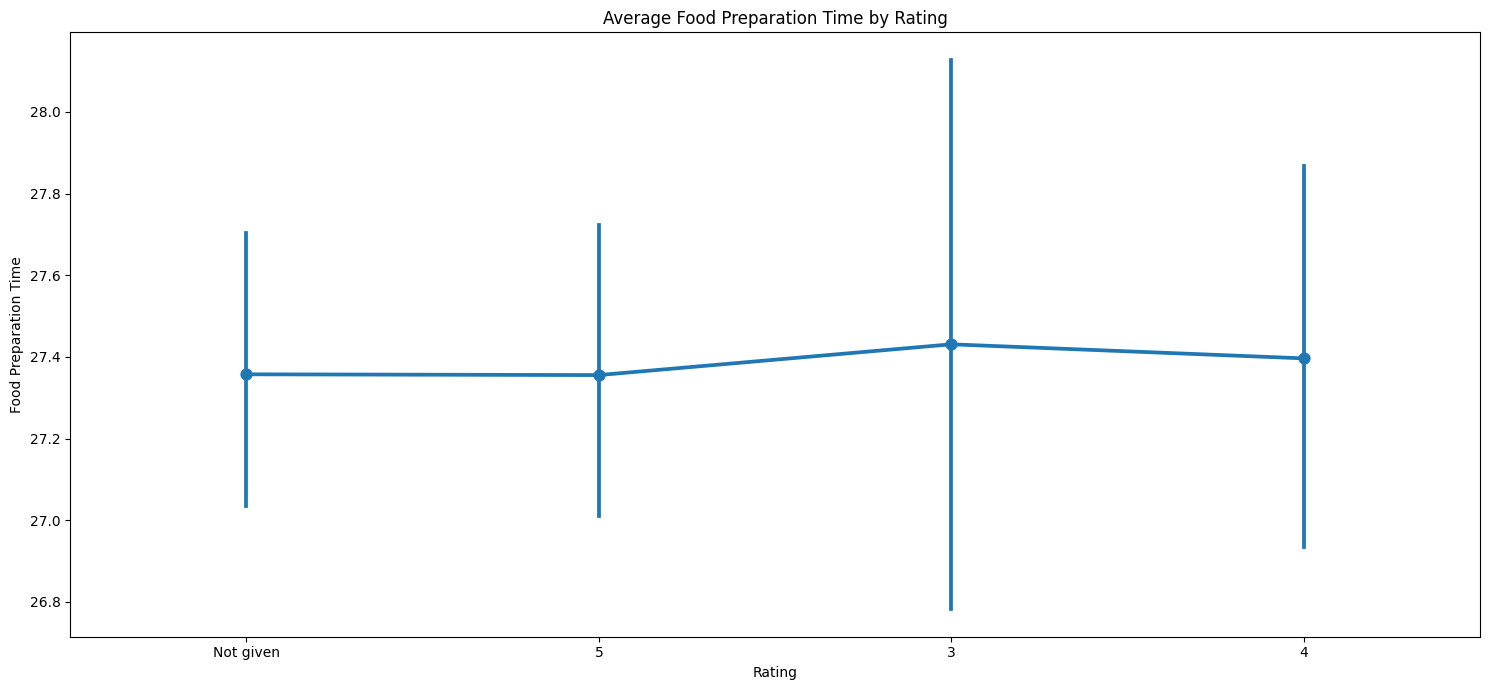

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  # Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.title('Average Food Preparation Time by Rating')
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time')
plt.tight_layout()
plt.show()

**Observations - Answer 12:**
*  Orders with a rating of 3 have the longest average food preparation time of approximately 27.4 minutes, but also have the largest variation of between 26.8 and over 28 minutes.
*    Orders with ratings 'Not given', 5 and 4 also have a similar food preparation time of 27.4 minutes, but have less variation than orders with a rating of 3.
*    The data suggests there may be a relationship with variability in food preparation time and customer satisfaction.

#### Rating vs Cost of the order

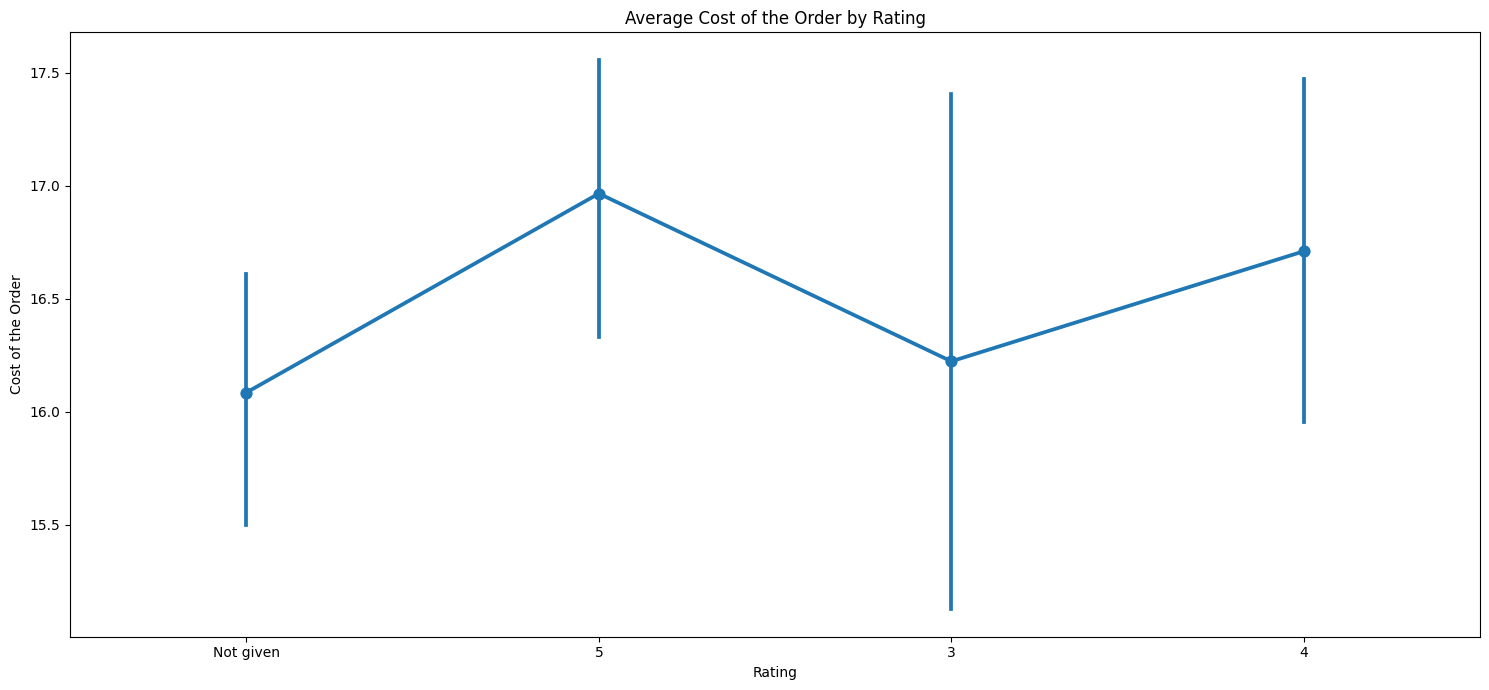

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)   # Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.title('Average Cost of the Order by Rating')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
plt.tight_layout()
plt.show()

**Observations - Answer 12:**
*    The lowest average cost of the order is approximately 16.25 dollars, and is similar for both 'Not given' and 3 ratings.
*    The highest average cost of the order is approximately 17 dollars, and relates to the 5 rating.
*    On average, the lower the cost of order, the lower the rating (or no rating at all).

#### Correlation among variables

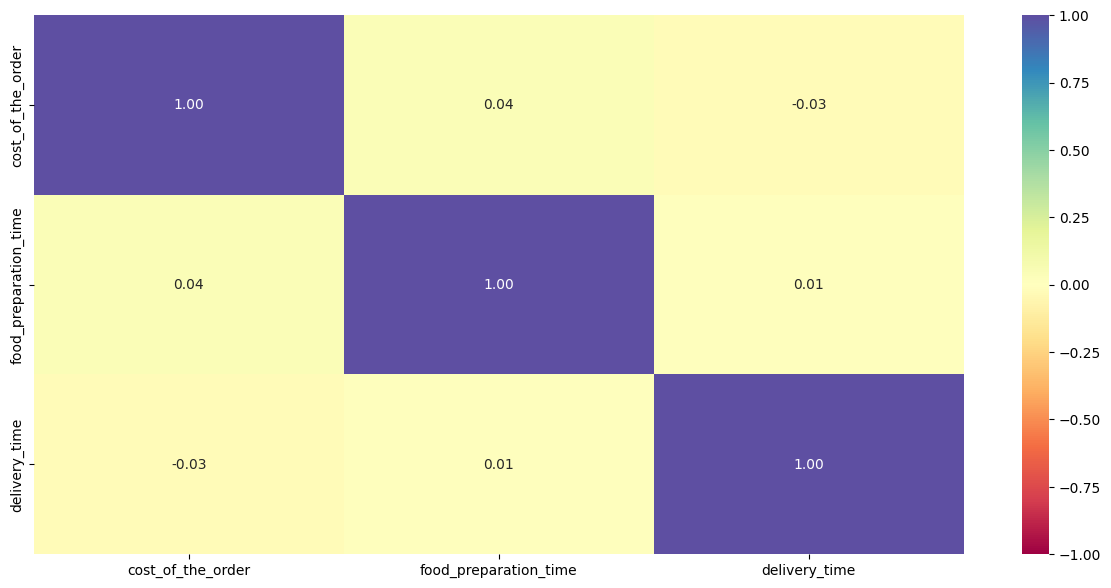

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations - Answer 12:**
* Overall, there is weak correlation between the variables 'cost of the order', 'food preparation time' and 'delivery time'.
* Cost of the order has weak positive correlation with food preparation time.
* Delivery time has weak positive correlation with food preparation time.
* Delivery time has weak negative correlation with cost of the order.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


There are four restaurants that have a rating count of more than 50.

In [ ]:
# Get the restaurant names that have a rating count of more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name'] # Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() # Complete the code to find the mean rating


,restaurant_name,rating
0,The Meatball Shop,4.51
1,Blue Ribbon Fried Chicken,4.33
2,Shake Shack,4.28
3,Blue Ribbon Sushi,4.22


**Answer 13:**
* There are four restaurants that have more than 50 reviews, and an average rating of 4 of more.
* These restaurants are the Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) # Write the appropriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


**Answer 14:**
* The table shows the top 5 rows of the revenue of orders.
* The revenue column shows the output of calculations where a 25% margin was applied on orders over 20 dollars and a 15% margin was applied on orders costing between 5 and 20 dollars.
* Orders costing less than 5 dollars had no margin applied.

In [ ]:
# Get the total revenue and print it
total_rev = df['Revenue'].sum() # Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]


In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time

### Get total preparation and delivery time that took greater than 60 minutes
# Count how many orders take more than 60 minutes
over_60 = df[df['total_time'] > 60].shape[0]

# Calculate total number of orders
total_orders = df.shape[0]

# Calculate percentage
percentage_over_60 = (over_60 / total_orders) * 100

# Print the result rounded to 2 decimal places
print(f"Percentage of orders taking more than 60 minutes: {round(percentage_over_60, 2)}%")



Percentage of orders taking more than 60 minutes: 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

# Write the code below to get the mean delivery time on weekends and print it

print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')





The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

**Order and Customer Volume**:

* The dataset contains 1898 orders from 1200 unique customers, suggesting repeat usage of the platform.

* Shake Shack received the highest number of orders (219), indicating strong customer preference.

**Cuisine Preferences**:

* American, Japanese, Italian and Chinese cuisines are the most ordered.

* Less popular cuisines include Vietnamese, Spanish, and Korean.

**Order Cost**:

* Most orders cost between 10 and 20 dollars.

* About 29% of orders cost more than $20, which is significant for revenue (as there is a 25% margin applied to these orders).

* The cost distribution is right-skewed, with a few higher-value orders around $35.

**Delivery and Preparation Time**:

* Average food preparation time is 27.4 minutes, and this is fairly consistent across cuisines.

* Average delivery time is 24.2 minutes, with no major outliers.

* 10.5% of orders take more than 60 minutes in total (prep + delivery).

* Weekend deliveries are, on average, 6 minutes faster than weekday ones.

**Ratings**:

* 39% of orders are not rated (736 out of 1898).

* Among those that are rated, 5-star ratings are most common, with low ratings (3) linked to longer delivery and prep times.

* Restaurants with average ratings above 4 and more than 50 ratings include Shake Shack, Blue Ribbon Sushi, The Meatball Shop, and Blue Ribbon Fried Chicken.

* Faster delivery doesn't consistently lead to higher ratings, but slower delivery and prep time are associated with lower ratings (e.g. rating 3 orders).

**Revenue**:

* The platform earned approximately $6166.30 in revenue using a tiered commission model.

* High-cost orders (> $20) generated the most revenue due to the 25% commission rate.

### Recommendations:

**1. Promote top-rated, high-volume restaurants**:

* Offer featured placements or advertising support to Shake Shack, Blue Ribbon Sushi, and The Meatball Shop — these have strong order volumes and high ratings.

* Encourage them to maintain fast delivery and prep consistency.

**2. Encourage high-value orders (>$20) to boost revenue**:

* Consider bundling or upselling (e.g. sides, desserts) in-app to encourage larger basket sizes.

**3. Reduce weekday delivery delays**:

* Collaborate with delivery partners to understand weekday traffic patterns.

* Consider dynamic routing or time-of-day staffing models to reduce weekday delivery delays.

**4. Expand high-performing cuisine categories to meet user preferences**:

* Focus on onboarding more American, Japanese, and Italian cuisine partners, as these are currently in highest demand.

* Focus on promoting these cuisine partners in bundling / upselling activity.

**5. Improve feedback response rate to improve feedback quality**:

* Introduce rating nudges via app notifications post-delivery to reduce the 39% of orders that go unrated.

* Consider small incentives (e.g. loyalty points) to increase rating participation and improve data quality.

**6. Target slow performers and monitor cuisine-specific prep time issues**:

* Investigate restaurants or cuisines with longer prep times (e.g. Southern and Thai food) and work with them to streamline kitchen operations.

* Monitor and replicate weekend delivery practices where possible during weekdays.

---